# Análisis exploratorio  

In [1]:
from ucimlrepo import fetch_ucirepo 
import funciones as fn
datos = fetch_ucirepo(id=544)

In [2]:
import pandas as pd
X=datos["data"]["features"]
Y=datos["data"]["targets"]
df=pd.concat([pd.DataFrame(X),pd.DataFrame(Y)],axis=1)
df_copy=df.copy()

Este conjunto de datos incluye datos para la estimación de niveles de obesidad en individuos de los países de México, Perú y Colombia, en función de sus hábitos alimentarios y condición física. Los datos contienen 17 atributos y 2111 registros, los registros están etiquetados con la variable de clase NObesity (Nivel de Obesidad), que permite clasificar los datos utilizando los valores de Peso Insuficiente, Peso Normal, Sobrepeso Nivel I, Sobrepeso Nivel II, Obesidad Tipo I. , Obesidad Tipo II y Obesidad Tipo III. El 77% de los datos se generaron de forma sintética utilizando la herramienta Weka y el filtro SMOTE, el 23% de los datos se recogieron directamente de los usuarios a través de una plataforma web.

In [3]:
df
#df_copy.to_csv('../Datos/obesity.csv')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## Nivel de obesidad	

La obesidad es una condición en la que hay una acumulación anormal o excesiva de grasa corporal, lo cual puede ser perjudicial para la salud. Aquí están los niveles y definiciones relacionados con el sobrepeso y la obesidad:

**Sobrepeso:**

*   Índice de Masa Corporal (IMC) igual o superior a 25.
*   El IMC se calcula dividiendo el peso de una persona en kilogramos por el cuadrado de su talla en metros (kg/m²).
*   El sobrepeso se aplica a adultos.
*   Es importante tener en cuenta que el IMC es un valor aproximado y puede variar según la constitución individual.

**Obesidad:**

*   IMC igual o superior a 30.
*   La obesidad también se aplica a adultos.
*   Existen diferentes grados de obesidad:
*   Obesidad tipo I: IMC entre 30 y 34.9.
*   Obesidad tipo II (preobesidad): IMC entre 35 y 39.9.
*   Obesidad tipo III / Obesidad Mórbida: IMC igual o mayor a 40 123.

<Axes: xlabel='NObeyesdad'>

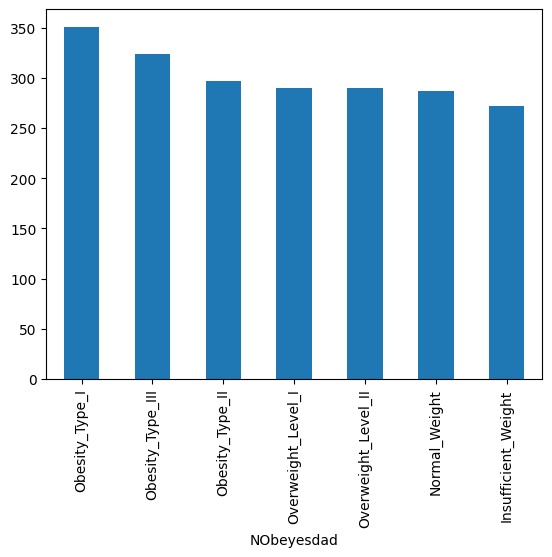

In [4]:
df['NObeyesdad'].value_counts().plot.bar()

A continuación, vamos a volver binaria la anterior variable, vamos a marcar a una persona como obesa si tiene algún tipo de obesidad y no obesa, al contrario. 

In [5]:
df['NObeyesdad'] = df['NObeyesdad'].map({'Normal_Weight': 0, 'Overweight_Level_I': 0,
                                        'Overweight_Level_II': 0, 'Obesity_Type_I': 1,
                                        'Obesity_Type_II': 1, 'Obesity_Type_III': 1})
df['NObeyesdad'] = df['NObeyesdad'].astype('category')

<Axes: ylabel='count'>

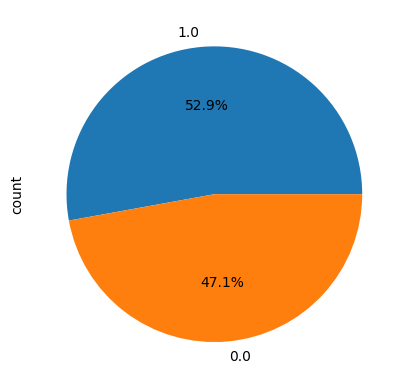

In [6]:
df['NObeyesdad'].value_counts().plot.pie(autopct='%1.1f%%')

## Variable Gender

La cantidad de hombres y mujeres en la base son aproximadamente equilibradas 


<Axes: title={'center': 'Frecuencia de genero'}, xlabel='Gender'>

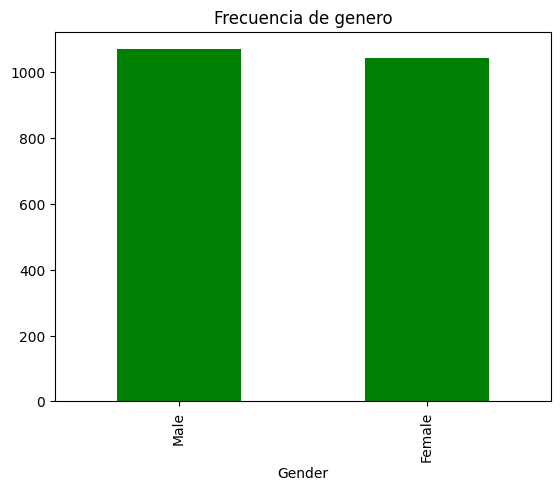

In [7]:
df["Gender"].value_counts().plot.bar(x="genero",
                                     y="frecuencia",
                                     title="Frecuencia de genero",
                                     color="green")

En el siguiente gráfico podemos observar que el porcentaje de mujeres con obesidad es mayor que para los hombres. 

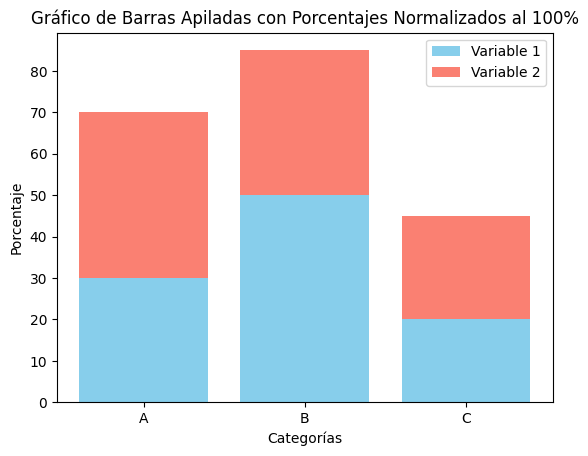

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo (puedes reemplazarlos con tus propios datos)
categorias = ["A", "B", "C"]
valores_var1 = [30, 50, 20]  # Valores para la variable 1
valores_var2 = [40, 35, 25]  # Valores para la variable 2

# Calcula los porcentajes relativos para cada variable
total_var1 = sum(valores_var1)
total_var2 = sum(valores_var2)
porcentajes_var1 = [(v / total_var1) * 100 for v in valores_var1]
porcentajes_var2 = [(v / total_var2) * 100 for v in valores_var2]

# Crea las barras apiladas con porcentajes normalizados
plt.bar(categorias, porcentajes_var1, label="Variable 1", color="skyblue")
plt.bar(categorias, porcentajes_var2, bottom=porcentajes_var1, label="Variable 2", color="salmon")

# Etiquetas y título
plt.xlabel("Categorías")
plt.ylabel("Porcentaje")
plt.title("Gráfico de Barras Apiladas con Porcentajes Normalizados al 100%")

# Leyenda
plt.legend()

# Muestra el gráfico
plt.show()





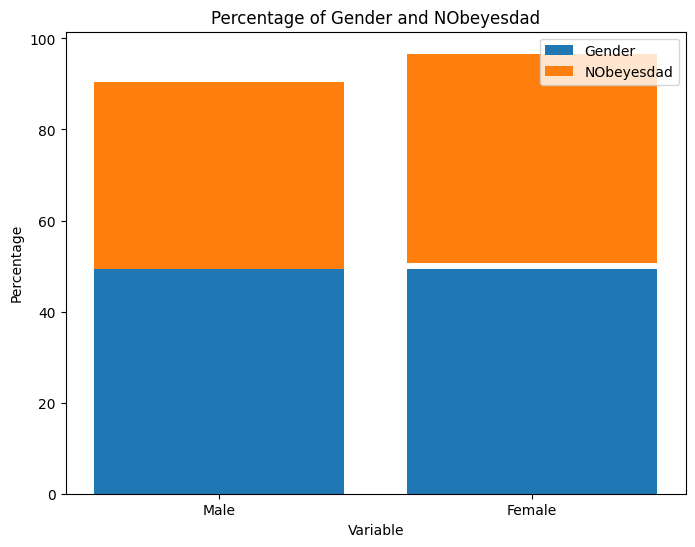

Para la codificación de esta variación utilizaremos en OneHot encoder

## AGE

*   No se observan anomalías en la variable
*   Como es de esperarce se ve una asimetría positiva

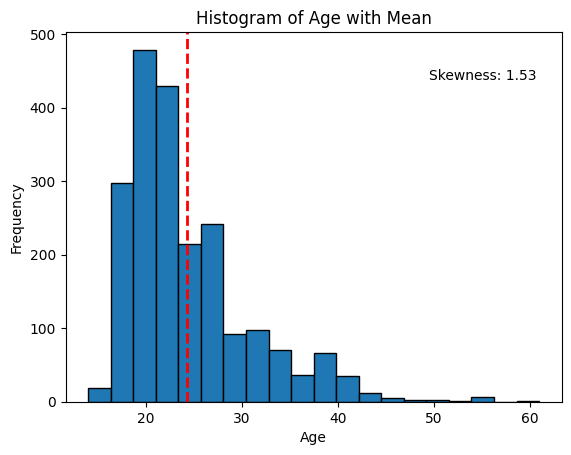

In [10]:
from scipy.stats import skew
import matplotlib.pyplot as plt
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.axvline(df['Age'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age with Mean')

skewness = skew(df['Age'])
plt.text(0.95, 0.9, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top')

plt.show()



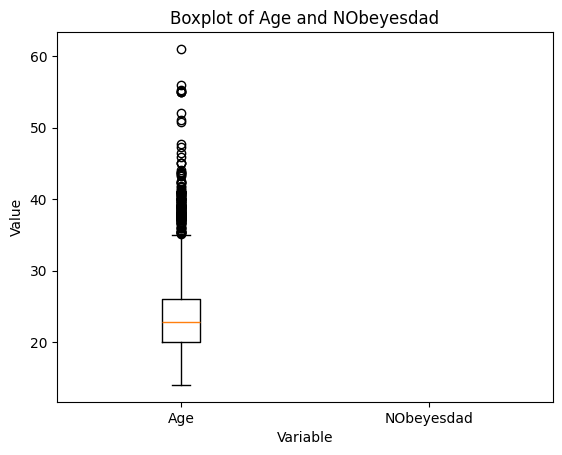

In [11]:
plt.boxplot([df['Age'], df['NObeyesdad']])
plt.xticks([1, 2], ['Age', 'NObeyesdad'])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Boxplot of Age and NObeyesdad')
plt.show()

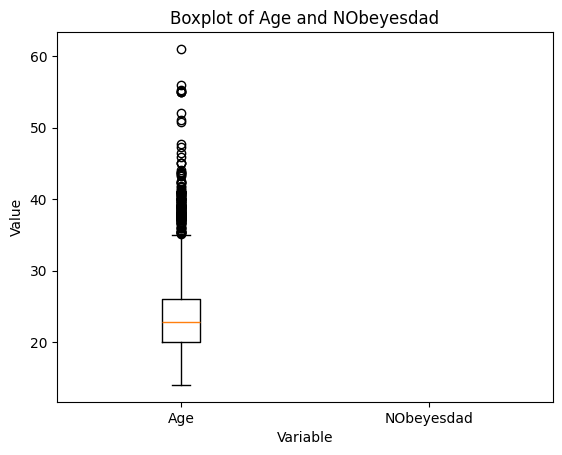

In [12]:
plt.boxplot([df['Age'], df['NObeyesdad']])
plt.xticks([1, 2], ['Age', 'NObeyesdad'])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Boxplot of Age and NObeyesdad')
plt.show()


## Estatura 

*   No se observan anomalías en la variable
*   Como es de esperarce se ve una simetría en el histograma y poca Kurtosis

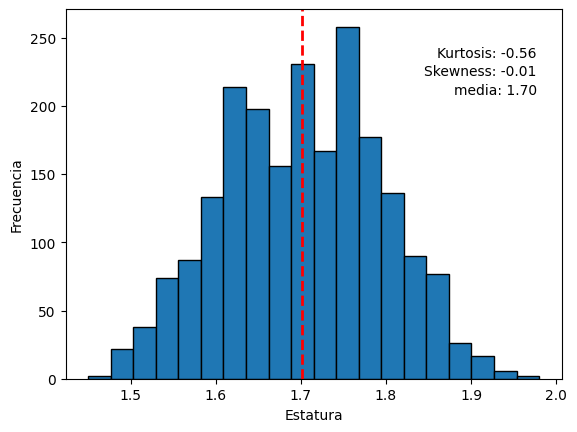

In [13]:
plt.hist(df['Height'], bins=20, edgecolor='black')
plt.axvline(df['Height'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Estatura')
plt.ylabel('Frecuencia')

kurtosis = df['Height'].kurtosis()
skewness = df['Height'].skew()
media=df['Height'].mean()
plt.text(0.95, 0.9, f'Kurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.8, f'media: {media:.2f}', transform=plt.gca().transAxes, ha='right', va='top')

plt.show()


## PESO

*   No se observan anomalías en la variable
*   Como es de esperarce se ve una pequeña asimetría y Kurtosis en el histograma



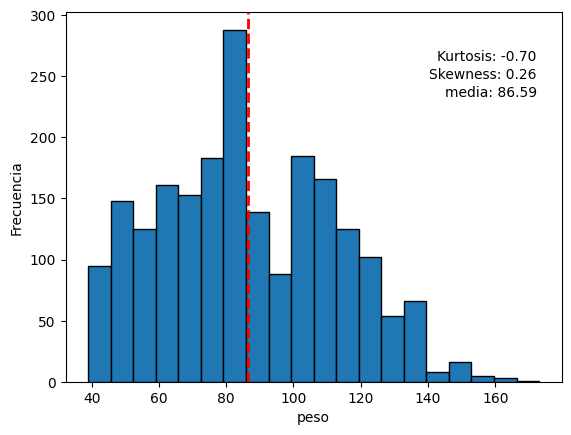

In [14]:
plt.hist(df['Weight'], bins=20, edgecolor='black')
plt.axvline(df['Weight'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('peso')
plt.ylabel('Frecuencia')

kurtosis = df['Weight'].kurtosis()
skewness = df['Weight'].skew()
media=df['Weight'].mean()
plt.text(0.95, 0.9, f'Kurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.8, f'media: {media:.2f}', transform=plt.gca().transAxes, ha='right', va='top')

plt.show()

# Historial de la familia con sobrepeso  

 El 81.7% de las personas tiene al menos un familiar con sobrepeso

In [15]:
df['family_history_with_overweight'].value_counts()/len(df['family_history_with_overweight'])*100

family_history_with_overweight
yes    81.762198
no     18.237802
Name: count, dtype: float64

## ¿Consume alimentos ricos en calorías con frecuencia?

El 88.3% de las personas consumen alimentos ricos en calorías con frecuencia

In [16]:
df['FAVC'].value_counts()/len(df['FAVC'])*100

FAVC
yes    88.394126
no     11.605874
Name: count, dtype: float64

## ¿Sueles comer verduras en tus comidas?

Podemos ver que a pesar de ser una variable entera, tenemos valores que no corresponden a la variable, por lo que se debe de limpiar la variable para poder trabajar con ella. para esto vamos a redondear los valores a al entero mas cercano y luego convertirlos a enteros.

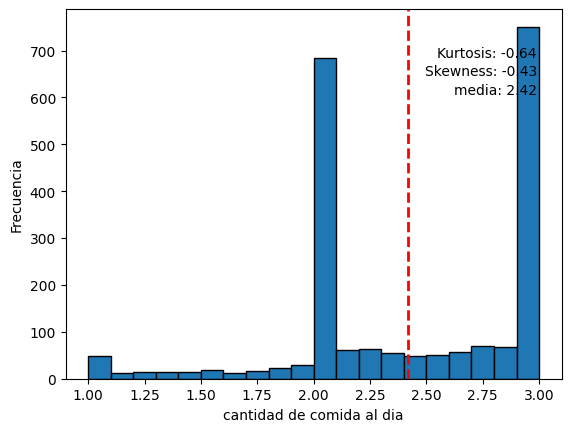

In [17]:
plt.hist(df['FCVC'], bins=20, edgecolor='black')
plt.axvline(df['FCVC'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('cantidad de comida al dia')
plt.ylabel('Frecuencia')

kurtosis = df['FCVC'].kurtosis()
skewness = df['FCVC'].skew()
media=df['FCVC'].mean()
plt.text(0.95, 0.9, f'Kurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.8, f'media: {media:.2f}', transform=plt.gca().transAxes, ha='right', va='top')

plt.show()

In [18]:

df=fn.redondear_variables(df,['FCVC'])


<Axes: xlabel='FCVC'>

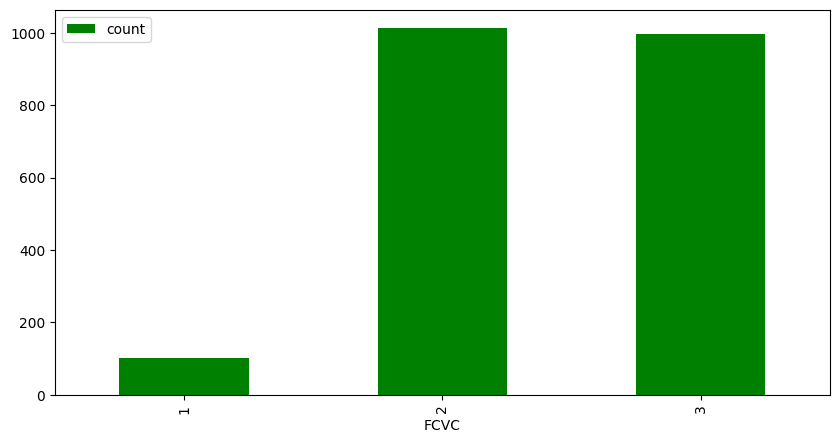

In [19]:
pd.DataFrame( df[ 'FCVC'].value_counts()).sort_values(by='FCVC').plot(kind='bar',figsize=(10,5),color='green')

## ¿Cuántas comidas principales haces al día?

Podemos ver que a pesar de ser una variable entera, tenemos valores que no corresponden a la variable, por lo que se debe de limpiar la variable para poder trabajar con ella. para esto vamos a redondear los valores a al entero mas cercano y luego convertirlos a enteros.

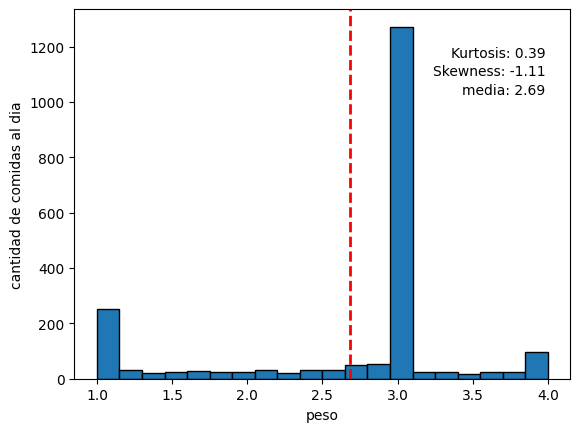

In [20]:
plt.hist(df['NCP'], bins=20, edgecolor='black')
plt.axvline(df['NCP'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('peso')
plt.ylabel('cantidad de comidas al dia')

kurtosis = df['NCP'].kurtosis()
skewness = df['NCP'].skew()
media=df['NCP'].mean()
plt.text(0.95, 0.9, f'Kurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.8, f'media: {media:.2f}', transform=plt.gca().transAxes, ha='right', va='top')

plt.show()

In [21]:
df=fn.redondear_variables(df,['NCP'])

<Axes: xlabel='NCP'>

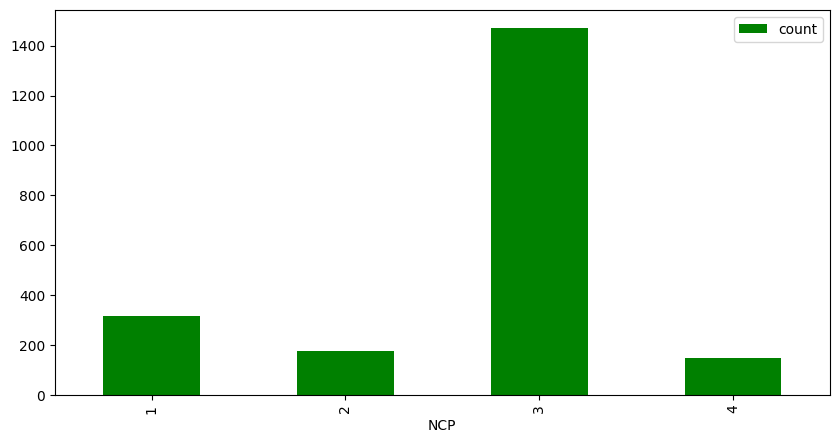

In [22]:
pd.DataFrame( df[ 'NCP'].value_counts()).sort_values(by='NCP').plot(kind='bar',figsize=(10,5),color='green')

## ¿Comes algún alimento entre comidas?

<Axes: xlabel='CAEC'>

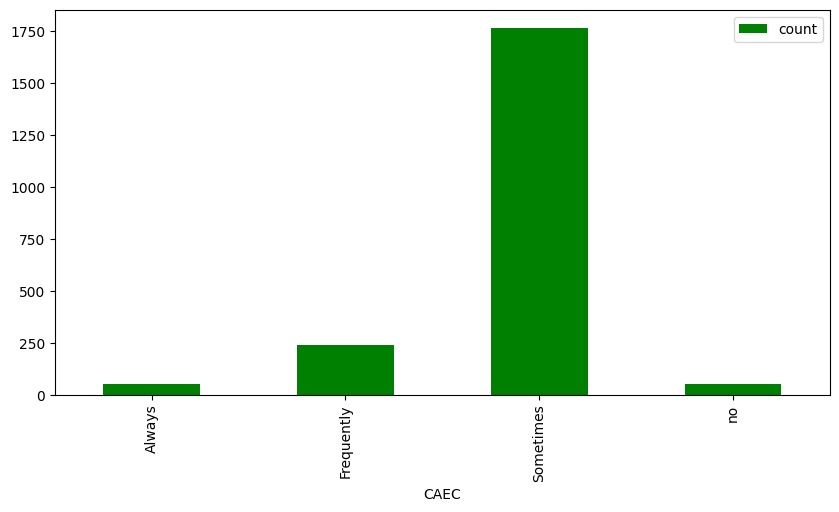

In [23]:
pd.DataFrame( df[ 'CAEC'].value_counts()).sort_values(by='CAEC').plot(kind='bar',figsize=(10,5),color='green')

## ¿Fuma usted?

<Axes: xlabel='SMOKE'>

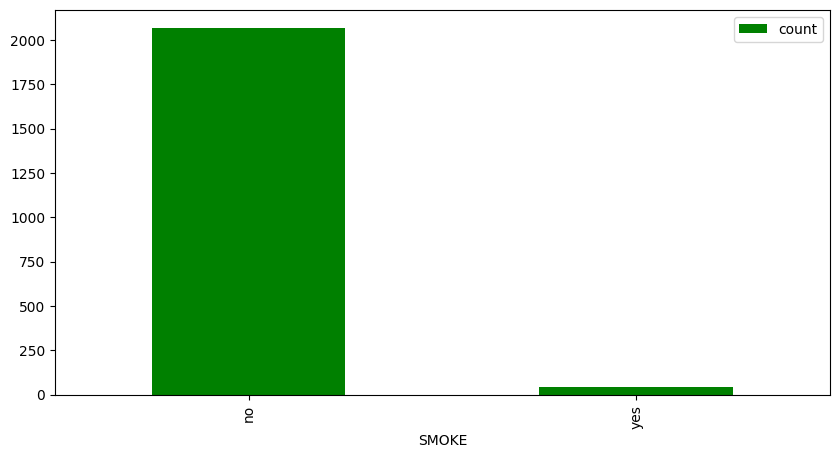

In [24]:
pd.DataFrame( df[ 'SMOKE'].value_counts()).sort_values(by='SMOKE').plot(kind='bar',figsize=(10,5),color='green')

## 	¿Cuánta agua bebes diariamente?

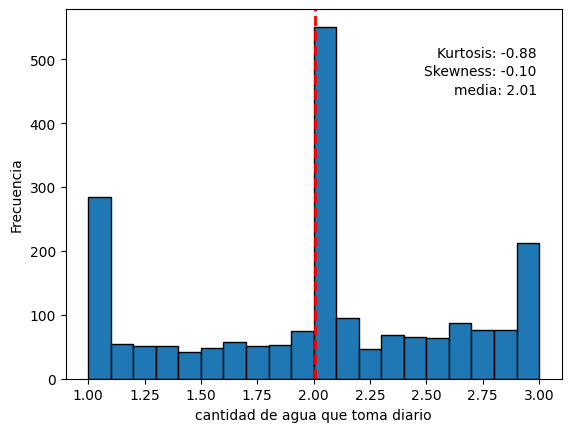

In [25]:
plt.hist(df['CH2O'], bins=20, edgecolor='black')
plt.axvline(df['CH2O'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('cantidad de agua que toma diario')
plt.ylabel('Frecuencia')

kurtosis = df['CH2O'].kurtosis()
skewness = df['CH2O'].skew()
media=df['CH2O'].mean()
plt.text(0.95, 0.9, f'Kurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.8, f'media: {media:.2f}', transform=plt.gca().transAxes, ha='right', va='top')

plt.show()

 ## ¿Controlas las calorías que ingieres a diario?

<Axes: ylabel='count'>

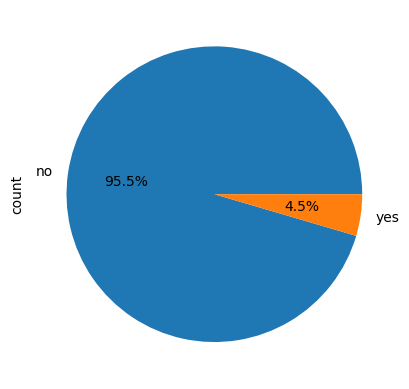

In [26]:
df['SCC'].value_counts().plot.pie(autopct='%1.1f%%')


## ¿Con qué frecuencia realiza actividad física?


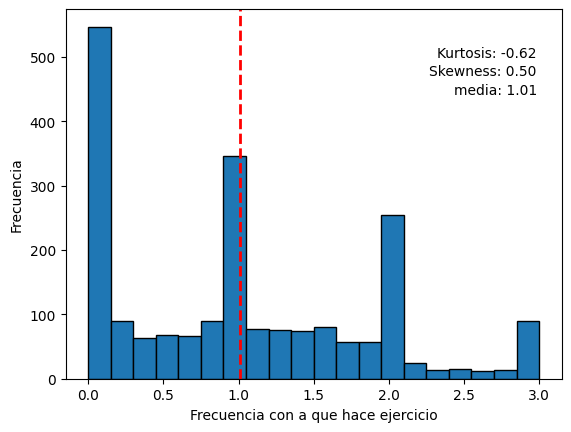

In [27]:
plt.hist(df['FAF'], bins=20, edgecolor='black')
plt.axvline(df['FAF'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Frecuencia con a que hace ejercicio')
plt.ylabel('Frecuencia')

kurtosis = df['FAF'].kurtosis()
skewness = df['FAF'].skew()
media=df['FAF'].mean()
plt.text(0.95, 0.9, f'Kurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.8, f'media: {media:.2f}', transform=plt.gca().transAxes, ha='right', va='top')

plt.show()

<Axes: ylabel='count'>

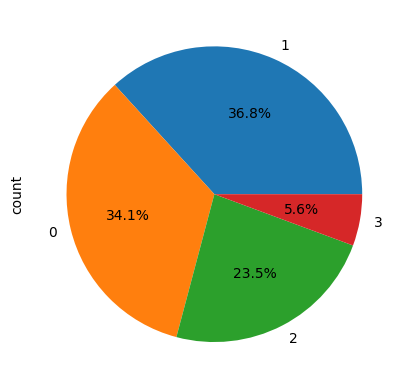

In [28]:
df=fn.redondear_variables(df,['FAF'])
df['FAF'].value_counts().plot.pie(autopct='%1.1f%%')

## ¿Cuánto tiempo utilizas aparatos tecnológicos como el móvil, los videojuegos, la televisión, el ordenador y otros?

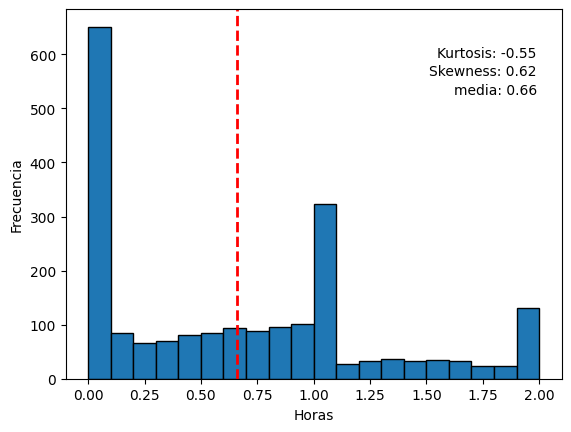

In [29]:
plt.hist(df['TUE'], bins=20, edgecolor='black')
plt.axvline(df['TUE'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Horas')
plt.ylabel('Frecuencia')

kurtosis = df['TUE'].kurtosis()
skewness = df['TUE'].skew()
media=df['TUE'].mean()
plt.text(0.95, 0.9, f'Kurtosis: {kurtosis:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.85, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes, ha='right', va='top')
plt.text(0.95, 0.8, f'media: {media:.2f}', transform=plt.gca().transAxes, ha='right', va='top')

plt.show()

## ¿Con qué frecuencia bebe alcohol?


<Axes: ylabel='count'>

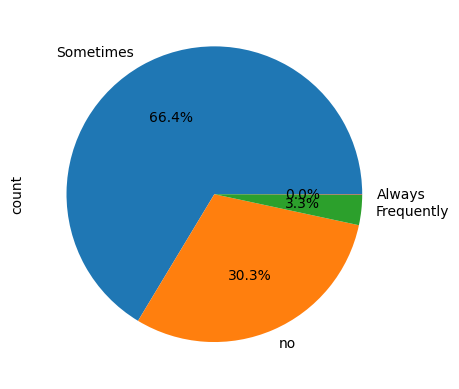

In [30]:
df['CALC'].value_counts().plot.pie(autopct='%1.1f%%')

## ¿Qué medio de transporte utiliza habitualmente?

<Axes: xlabel='MTRANS'>

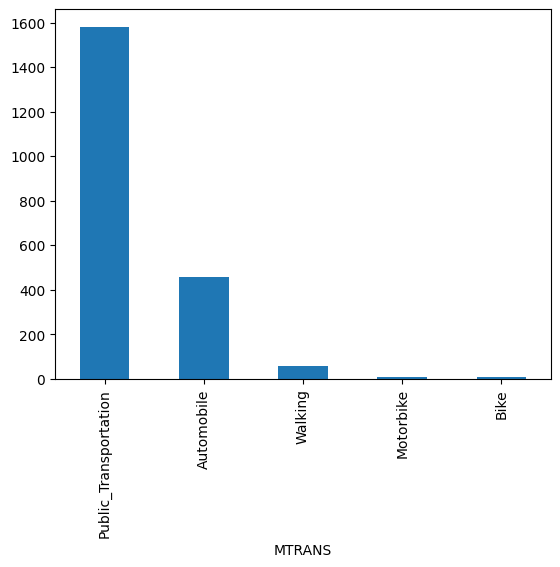

In [31]:
df['MTRANS'].value_counts().plot.bar()